In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import warnings

In [5]:
warnings.filterwarnings('ignore')

In [6]:
from sklearn.naive_bayes import MultinomialNB

In [7]:
from sklearn.multiclass import OneVsRestClassifier

In [8]:
from sklearn import metrics

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
from pandas.plotting import scatter_matrix

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
from sklearn import metrics

### Dataset Overview:

The resumeDataSet DataFrame is sourced from the file resume_dataset.csv, containing a collection of resumes. Each row represents a resume, with various attributes such as education, work experience, skills, etc.

### Data Cleaning Process:

To prepare the dataset for analysis or machine learning tasks, a new column named cleaned_resume has been added to the DataFrame. This column will store the cleaned and preprocessed versions of the resumes. Cleaning typically involves removing irrelevant characters, standardizing formats, and handling any inconsistencies to ensure uniformity across the dataset.

In [13]:
resumeDataSet = pd.read_csv('resume_dataset.csv' ,encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",


### Displaying Distinct Categories of Resumes:

In this cell, we are examining the distinct categories of resumes present in the dataset. The Category column in the DataFrame resumeDataSet contains information about the professional domain or job type associated with each resume

In [14]:
print ("Displaying the distinct categories of resume -")
print (resumeDataSet['Category'].unique())


Displaying the distinct categories of resume -
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


### Displaying Distinct Categories of Resumes with Record Counts:

This code snippet provides an overview of the distinct categories of resumes in the dataset along with the number of records belonging to each category. By examining the distribution of records across categories, we gain insight into the prevalence of different professional domains or job types in the dataset.

In [15]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
Category
Java Developer               14
Database                     11
HR                           11
Data Science                 10
Advocate                     10
DotNet Developer              7
Hadoop                        7
DevOps Engineer               7
Automation Testing            7
Testing                       7
Civil Engineer                6
Business Analyst              6
SAP Developer                 6
Health and fitness            6
Python Developer              6
Arts                          6
Electrical Engineering        5
Sales                         5
Network Security Engineer     5
Mechanical Engineer           5
Web Designing                 5
ETL Developer                 5
Blockchain                    5
Operations Manager            4
PMO                           3
Name: count, dtype: int64


In [16]:
import seaborn as sns

<Axes: xlabel='count', ylabel='Category'>

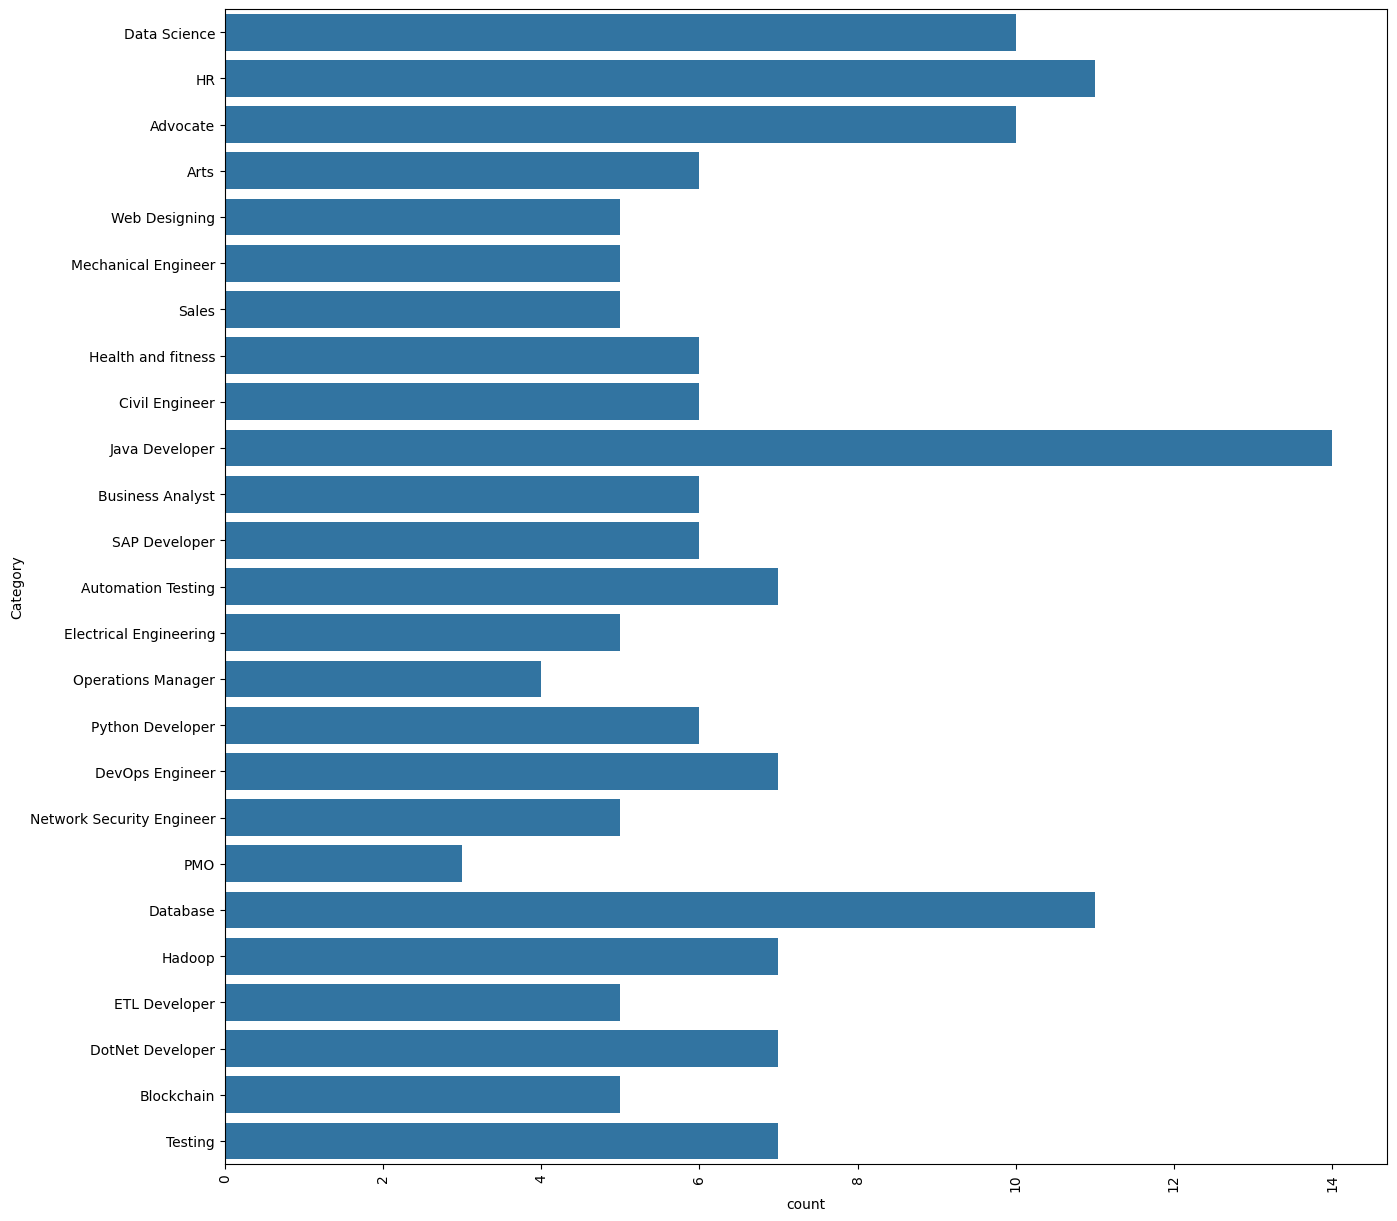

In [17]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resumeDataSet)

### GridSpec for Customized Subplots:

The GridSpec module from Matplotlib allows for the creation of complex subplot layouts in a flexible and customizable manner. It provides a powerful interface for arranging subplots in a grid-like fashion, enabling users to specify the size, shape, and alignment of each subplot within the grid.

In [18]:
from matplotlib.gridspec import GridSpec

### Visualizing Category Distribution with Pie Chart:

This code snippet utilizes Matplotlib and GridSpec to create a pie chart visualization representing the distribution of categories in the resume dataset. Each category is depicted as a segment of the pie chart, with its proportion relative to the total number of resumes displayed as a percentage.

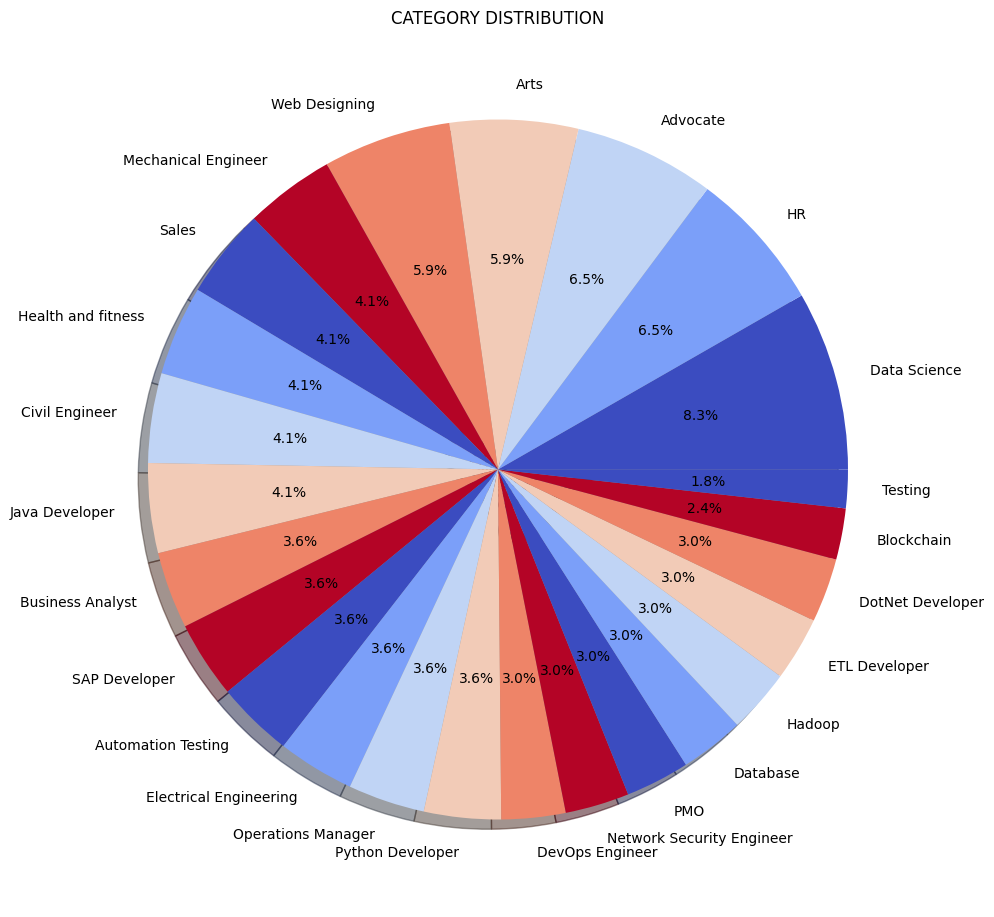

In [19]:
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = resumeDataSet['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 6)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

### Cleaning Resume Text:

The cleanResume() function defined in this code snippet performs preprocessing on the textual content of resumes. This preprocessing involves removing various types of noise and irrelevant information to ensure that the resume text is clean and ready for further analysis or processing.

### Cleaning Steps:

URL Removal: URLs are removed from the resume text using regular expressions to eliminate any web links present.
RT and cc Removal: Common Twitter-related terms like "RT" and "cc" are removed from the text.
Hashtag Removal: Hashtags are removed to eliminate any Twitter-style hashtags present in the text.
Mention Removal: User mentions, typically denoted by "@" symbols, are removed.
Punctuation Removal: Punctuation marks and special characters are removed from the text.
Non-ASCII Character Removal: Non-ASCII characters are replaced with whitespace to ensure compatibility with text processing algorithms.
Whitespace Cleanup: Extra whitespace is removed to standardize the text format.

In [20]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

### Creating Word Cloud from Resumes:

This code snippet utilizes NLTK and WordCloud libraries to generate a word cloud visualization based on the textual content of resumes in the dataset. The word cloud provides a visual representation of the most frequent words found in the resumes, allowing for quick identification of common themes or keywords.

### Code Explanation:

Importing Libraries and Downloading Resources:
The code imports the necessary libraries, including NLTK, WordCloud, and string. Additionally, it downloads the required NLTK resources such as stopwords and punkt tokenizer.
Preprocessing and Tokenization:
The resumes are preprocessed using the cleanResume() function to remove noise and irrelevant information.
Tokenization is performed using NLTK's word tokenizer to break down the cleaned text into individual words.
Word Frequency Calculation:
A frequency distribution is created using NLTK's FreqDist function to count the occurrences of each word in the cleaned text.
Generating Word Cloud:
The most common words (top 50) are extracted from the frequency distribution.
A WordCloud object is created and fed with the cleaned text to generate the word cloud visualization.
The resulting word cloud is displayed using Matplotlib.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('Exprience', 601), ('months', 499), ('company', 496), ('Details', 490), ('description', 436), ('1', 345), ('Project', 288), ('data', 243), ('project', 234), ('year', 218), ('SQL', 212), ('6', 209), ('Maharashtra', 205), ('team', 203), ('Less', 203), ('using', 195), ('January', 173), ('Management', 160), ('Pune', 147), ('C', 142), ('Education', 136), ('Ltd', 136), ('management', 135), ('database', 132), ('Data', 125), ('monthsCompany', 121), ('Engineering', 121), ('Server', 121), ('Database', 117), ('India', 117), ('like', 117), ('The', 116), ('various', 115), ('Pvt', 115), ('business', 114), ('application', 114), ('Responsibilities', 113), ('development', 112), ('System', 110), ('reports', 109), ('2', 109), ('A', 108), ('Java', 106), ('issues', 104), ('requirements', 104), ('Mumbai', 101), ('work', 98), ('system', 96), ('Role', 96), ('Test', 96)]


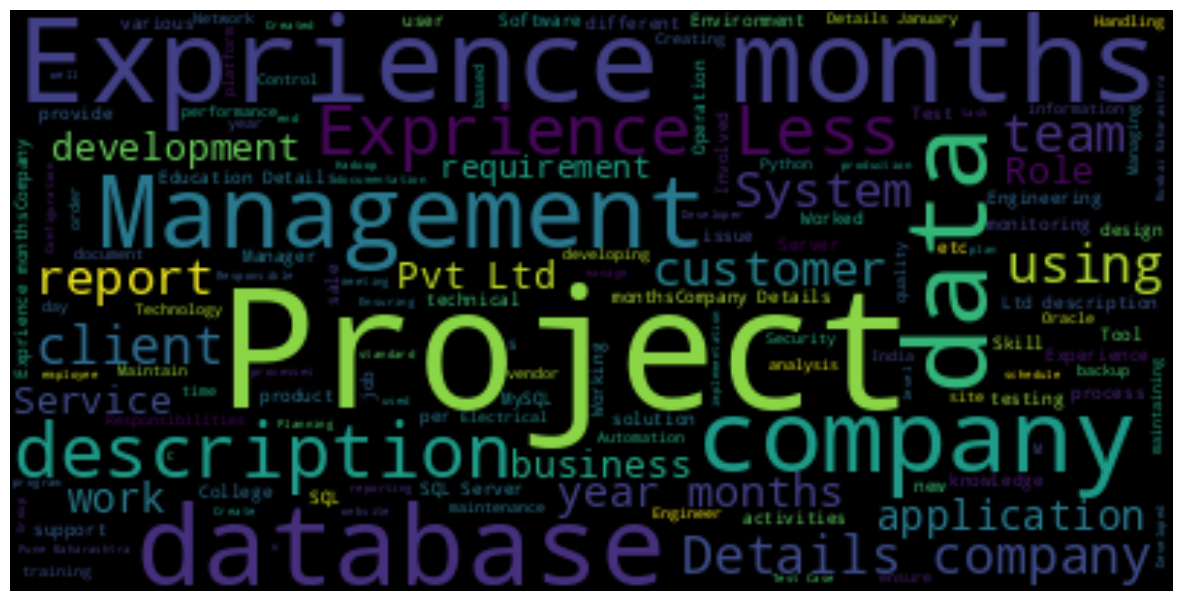

In [21]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Label Encoding of Categories:

In this code snippet, the LabelEncoder from the scikit-learn library is used to transform categorical variables, specifically the 'Category' column in the resume dataset, into numerical labels. This transformation is often necessary for machine learning algorithms that require numerical input.z


### Importing Libraries:
The code imports the LabelEncoder class from the scikit-learn library.
### Defining Categorical Variables:
The variable var_mod contains the list of categorical variables in the dataset, in this case, only 'Category'.
### Label Encoding:
A LabelEncoder object le is instantiated.
A loop iterates over each categorical variable in var_mod.
For each variable, the fit_transform() method of the LabelEncoder is used to fit the encoder to the unique categories in the variable and transform them into numerical labels.
The transformed labels are stored back into the respective columns of the DataFrame resumeDataSet.

In [22]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

This code snippet is for preparing text data for machine learning using TF-IDF (Term Frequency-Inverse Document Frequency) vectorization and splitting the data into training and testing sets.

### Here's a breakdown of what each part does:

### Importing Libraries:
 train_test_split: This function is used to split the data into training and testing sets.
 TfidfVectorizer: This class is used to convert text data into TF-IDF feature vectors.
 hstack: This function is used to horizontally stack sparse matrices.
### Data Preparation:
requiredText: This variable contains the cleaned text data from the 'cleaned_resume' column of the resumeDataSet.
requiredTarget: This variable contains the target labels (categories) from the 'Category' column of the resumeDataSet.
### TF-IDF Vectorization:
TfidfVectorizer: It's initialized with certain parameters:
sublinear_tf=True: This applies a logarithmic scale to the term frequencies.
stop_words='english': This removes common English stopwords from the text.
max_features=1500: This limits the number of features to the top 1500 most frequent terms.
fit: This method computes the IDF (Inverse Document Frequency) and the TF-IDF vectors for the given text data.
transform: This method transforms the text data into TF-IDF feature vectors using the fitted vectorizer.
### Splitting Data:
train_test_split: This function splits the TF-IDF features (WordFeatures) and the target labels (requiredTarget) into training and testing sets. It's split with 80% of the data for training (X_train, y_train) and 20% for testing (X_test, y_test).
random_state=0: This is used to ensure reproducibility by fixing the random seed.
test_size=0.2: This parameter specifies the proportion of the dataset to include in the testing split.
### Printing Shapes:
print(X_train.shape): This prints the shape of the training features.
print(X_test.shape): This prints the shape of the testing features.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(135, 1500)
(34, 1500)


### Training and Evaluating K-Nearest Neighbors Classifier:

This code snippet trains a K-Nearest Neighbors (KNN) classifier using the One-vs-Rest (OvR) strategy and evaluates its performance on both the training and test datasets. Additionally, it generates a classification report to provide detailed metrics for each class.

### Code Explanation:

### Classifier Initialization:
The OneVsRestClassifier is used to apply the KNN classifier (KNeighborsClassifier) with the OvR strategy.
### Model Training:
The classifier (clf) is trained on the training data (X_train and y_train) using the fit() method.
###Prediction:
Predictions are made on the test data (X_test) using the trained classifier (clf) via the predict() method.
### Performance Evaluation:
The accuracy of the classifier on both the training and test sets is calculated using the score() method.
Additionally, a classification report is generated using metrics.classification_report() to provide precision, recall, F1-score, and support for each class.

In [24]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.88
Accuracy of KNeighbors Classifier on test set: 0.79

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       0.50      1.00      0.67         1
           9       1.00      1.00      1.00         4
          11       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         2
          14       1.00      0.67      0.80         3
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       1.00      0.50      0.

### Top 3 Predicted Resumes per Category:

This code snippet generates predictions for the test set using the trained classifier and selects the top 3 predicted resumes for each category based on their predicted probabilities. It then displays these top resumes for each category to provide insights into the model's decision-making process.

### Code Explanation:

###Prediction and Probability Calculation:
Predictions are made on the test set (X_test) using the trained classifier (clf) via the predict_proba() and predict() methods.
The predicted probabilities and categories are stored in a DataFrame (predictions_df).
###Top Resumes Selection:
Resumes are grouped by their predicted category, and within each group, they are sorted based on their predicted probabilities.
The top 3 resumes with the highest predicted probabilities are selected for each category.
### Displaying Top Resumes:
For each category, the top 3 resumes are printed along with their respective contents.
The resumes are displayed in a structured format with headings indicating the category and resume number.

In [25]:
# Make predictions on the test set
predictions_prob = clf.predict_proba(X_test)
predicted_categories = clf.predict(X_test)

# Create a DataFrame to store predictions and true labels
predictions_df = pd.DataFrame(predictions_prob, columns=clf.classes_)
predictions_df['Predicted_Category'] = predicted_categories
predictions_df['True_Category'] = y_test

# Initialize a dictionary to store top 3 resumes for each category
top_3_resumes_per_category = {}

# Group the resumes by predicted category and iterate over each group
for category, group in predictions_df.groupby('Predicted_Category'):
    # Sort the resumes within each category based on their predicted probabilities
    sorted_resumes = group.sort_values(by=category, ascending=False)
    # Select the top 3 resumes for each category
    top_3_resumes = sorted_resumes.head(3)
    # Store the top 3 resumes for the current category in the dictionary
    top_3_resumes_per_category[category] = top_3_resumes

# Display the top 3 resumes for each category
for category, top_3_resumes in top_3_resumes_per_category.items():
    print(f"\nTop 3 Resumes for Category '{category}':\n")
    for i, (_, resume_row) in enumerate(top_3_resumes.iterrows(), 1):
        print(f"Resume {i}:")
        print(resumeDataSet.iloc[resume_row.name]['Resume'])
        print("-" * 50)



Top 3 Resumes for Category '0':

Resume 1:
QUALIFICATION: Introduction to Computer EXTRAEducation Details 
January 2001 to January 2003 Master Law Chennai, Tamil Nadu Dr.Ambedkar Law University
January 1998 to January 2001 Bachelor Law Chennai, Tamil Nadu Dr. Ambedkar Law University
January 1995 to January 1998 Bachelor English Literature Tirunelveli, Tamil Nadu Manonmaniam Sundaranar universityAdvocateAdvocateSkill Details 
Company Details 
company - Practiced
description - at

* High Court of Judicature at Madras, India

* City Civil Court, Chennai

* Debt Recovery Tribunal, Chennai

* Consumer Forums, Chennai

* Labour Courts

* Small Causes Courts

* Rent control Courts
* Legal advisor for Christian Institute of Management, Chennai in 2016
* Legal Advisor for Ruah church, Chennai and NESSA Trust till 2018
--------------------------------------------------

Top 3 Resumes for Category '2':

Resume 1:
I.T. Skills â¢ Windows XP, Ms Office (Word, Excel: Look-ups; Pivot table; other ba